In [51]:
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple
from PIL import Image
import os
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

In [88]:
%matplotlib inline
root_path = "./dataset"
run_type = "train"
df = pd.read_csv(root_path + "/CheXpert-v1.0-small/" + run_type + ".csv")
label_cols = df.columns[5:]

223414

In [48]:
df[label_cols] = df[label_cols].fillna(0)
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


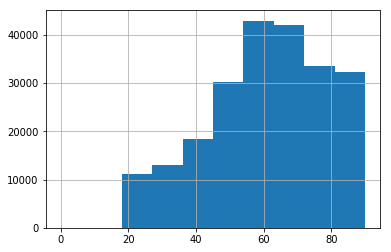

In [14]:
df['Age'].hist()

In [15]:
df['Frontal/Lateral'].value_counts()

Frontal    191027
Lateral     32387
Name: Frontal/Lateral, dtype: int64

In [89]:
df[label_cols] = df[label_cols].replace(-1,1)
df = df[df["Frontal/Lateral"] == "Frontal"]

In [90]:
len(df)

191027

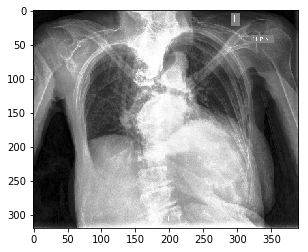

In [77]:
record = df.iloc[1]
img_path = os.path.join(root_path, record["Path"])
image = Image.open(img_path)
imgplot = plt.imshow(image)

In [78]:
arr = record[5:].to_numpy().astype('float32') 
arr

array([0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
      dtype=float32)

In [79]:
torch.from_numpy(arr)

tensor([0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.])

In [81]:
len(df)

191027

In [102]:
df = df.reset_index()
df.loc[129838]

index                                                                    160090
Path                          CheXpert-v1.0-small/train/patient37447/study5/...
Sex                                                                        Male
Age                                                                          69
Frontal/Lateral                                                         Frontal
AP/PA                                                                        AP
No Finding                                                                  NaN
Enlarged Cardiomediastinum                                                  NaN
Cardiomegaly                                                                NaN
Lung Opacity                                                                  1
Lung Lesion                                                                 NaN
Edema                                                                       NaN
Consolidation                           